<a href="https://colab.research.google.com/github/dhiegoemmanuel2006/data_analysis_bmw_sales/blob/main/bmw_sales_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📑**Descrição projeto**
O objetivo do projeto é colocar em prática diversos conceitos a respeito de **Python, Pandas, Matplotlib** e adentrar na base de dados atrás de informações relevantes.

O Dataset utilizado é vindo do site Kaggle, site normalmente utilizado com diversas bases de dados e testes relacionados a Análise e Ciêcia de dados.

url: https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024

🔎Informações chave


*   Asia é recorde em vendas
*   O melhor ano de vendas foi 2022
*   Top 3: 7 Series(23,7M), i8(23,42M), X1 (23,40M)


Instalando DataSet do Kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download ahmadrazakashif/bmw-worldwide-sales-records-20102024
!unzip bmw-worldwide-sales-records-20102024.zip

Dataset URL: https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024
License(s): ODC Public Domain Dedication and Licence (PDDL)
  0% 0.00/833k [00:00<?, ?B/s]
100% 833k/833k [00:00<00:00, 386MB/s]
Archive:  bmw-worldwide-sales-records-20102024.zip
  inflating: BMW sales data (2010-2024) (1).csv  


Instalação das bibliotecas

In [2]:
%pip install pandas matplot


1. Importando bibliotecas que serão utilizadas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

2. Lendo dados essênciais para uma análise inicial das informações

In [4]:
df = pd.read_csv('/content/BMW sales data (2010-2024) (1).csv')
df.shape
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


3. Criando nova coluna correspondente ao valor total de vendas
4. Criando novo DataFrame correspondente ao total de vendas dividido por região

In [5]:
df['Total_Sales'] = df['Sales_Volume'] * df['Price_USD']

total_sales = df.groupby('Region')['Total_Sales'].sum()

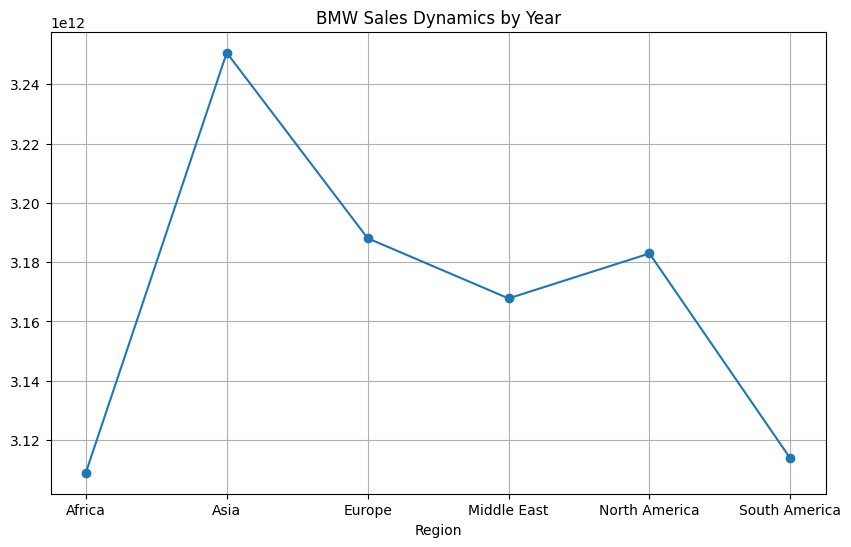

In [6]:
plt.figure(figsize=(10, 6))
total_sales.plot(marker='o')
plt.title('BMW Sales Dynamics by Year')
plt.grid(True)
plt.show()

5. Criando DataFrame com dados do volume de vendas de cada modelo de carro

In [7]:
top_models = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending = False).head(10)
top_models

,Sales_Volume
Model,
7 Series,23786466
i8,23423891
X1,23406060
3 Series,23281303
i3,23133849
5 Series,23097519
M5,22779688
X3,22745529
X5,22709749


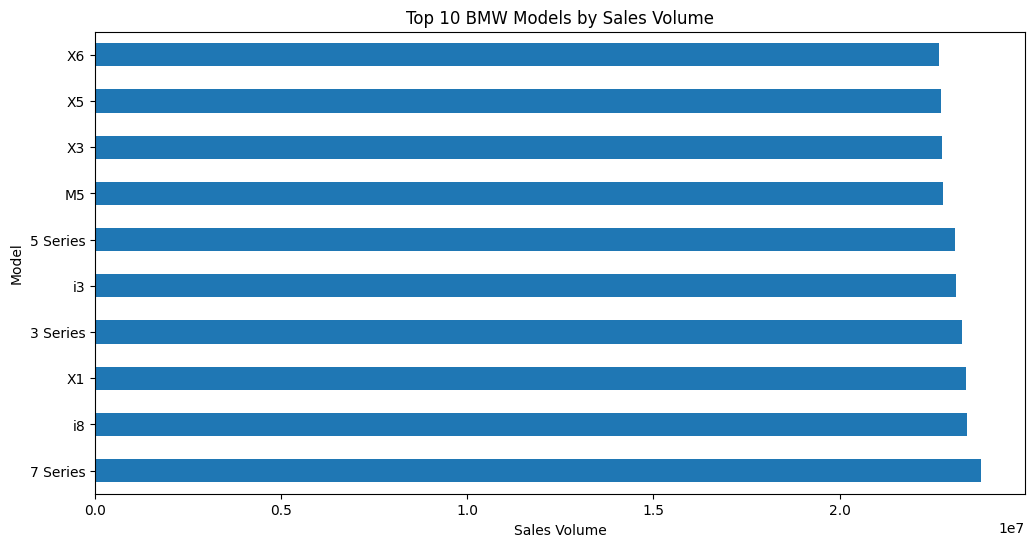

In [8]:
plt.figure(figsize=(12, 6))
top_models.plot(kind='barh')
plt.title('Top 10 BMW Models by Sales Volume')
plt.xlabel('Sales Volume')
plt.show()

6. Criando DataFrame com dados do volume de vendas de cada cor de carro

In [9]:
top_colors = df.groupby('Color')['Sales_Volume'].sum().sort_values(ascending=False)
top_colors

,Sales_Volume
Color,
Red,42750183
Silver,42674022
White,42272954
Grey,41995141
Blue,41972741
Black,41710693


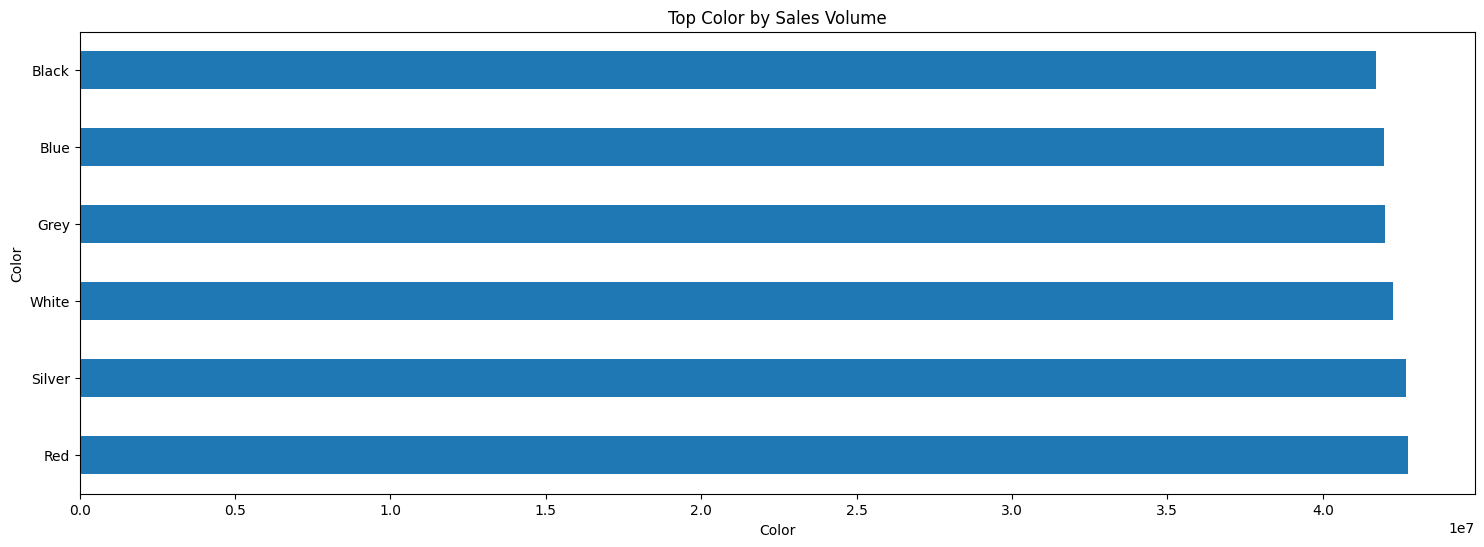

In [10]:
plt.figure(figsize=(18, 6))
top_colors.plot(kind='barh')
plt.title('Top Color by Sales Volume')
plt.xlabel('Color')
plt.show()


7. DataFrame responsável por medir quanto foi vendido em cada ano

In [11]:
year_volume = df.groupby('Year')['Sales_Volume'].sum()
year_volume

,Sales_Volume
Year,
2010,16933445
2011,16758941
2012,16751895
2013,16866733
2014,16958960
2015,17010207
2016,16957550
2017,16620811
2018,16412273


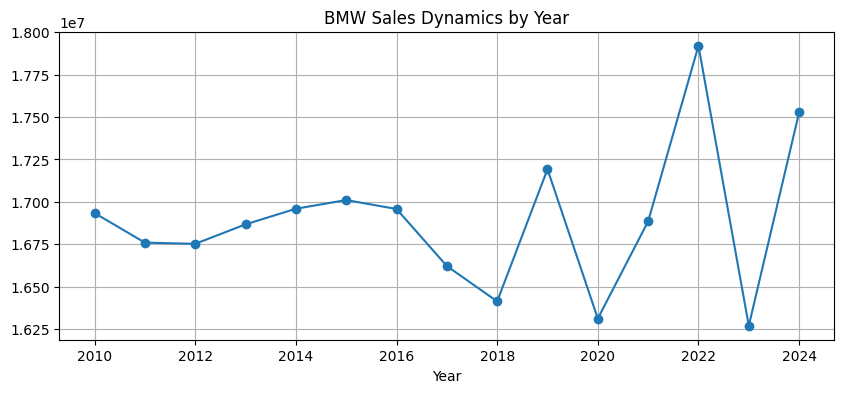

In [12]:
plt.figure(figsize=(10, 4))
year_volume.plot(marker='o')
plt.title('BMW Sales Dynamics by Year')
plt.grid(True)
plt.show()